In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Agenda
- Corona analysis
    - melt, pivot_table, join, merge
- Random variable
- Correlation analysis
    - Correlation matrix
    - Heatmap to visualize correlation matrix
    - Identify top correlated variables in a data frame
- Cosine similarity
- Structured data
- Unstructured text data -> Structured data - Document Term Matrix
- Word similarity
- Document similarity
- Populate custom functions in a python file and import it in jupyter notebook
- Exercises

In [7]:
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url)
cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
df_confirmed = confirmed.melt(id_vars=cols_retain)
df_confirmed = df_confirmed.rename(columns={'variable': 'Date',
                                            'value': 'confirmed'})
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'],
                                  format="%m/%d/%y")

In [21]:
# Identify top 10 countries with maximum cases as on yesterday
australia = df_confirmed[df_confirmed['Country/Region']=='Australia']

In [47]:

sample = pd.DataFrame({
    'product': ['a', 'b', 'c', 'a', 'b'],
    'Date': ['M', 'M',' M', 'T', 'T'],
    'sales': [1,2,3,4,5]
})
summary = sample.groupby(['product', 'Date']).agg({'sales': sum})
#summary.reset_index()

In [57]:
country_confirmed = df_confirmed.groupby(
    ['Country/Region', 'Date']).agg({'confirmed': sum})
country_confirmed = country_confirmed.reset_index()
#australia = country_confirmed[country_confirmed['Country/Region']=='Australia']
#australia['confirmed_abs'] = australia['confirmed'].diff()
#australia.plot.line(x='Date', y='confirmed_abs')

In [66]:
country_counts = country_confirmed.groupby(['Country/Region']).agg({'confirmed': 'last'})

In [65]:
latest_date = country_confirmed['Date'].max()
country_counts = country_confirmed[country_confirmed['Date'] == latest_date]

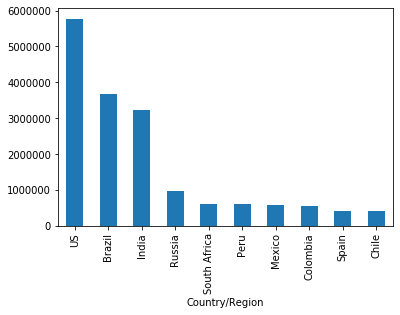

In [70]:
top_countries = country_counts.sort_values(by='confirmed',
                                           ascending=False).head(10)

top_countries['confirmed'].plot.bar()

In [83]:
def wrangle_data(url, entity_name):
    confirmed = pd.read_csv(url)
    cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df_confirmed = confirmed.melt(id_vars=cols_retain)
    df_confirmed = df_confirmed.rename(columns={'variable': 'Date',
                                                'value': entity_name})
    df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'],
                                      format="%m/%d/%y")
    country_confirmed = df_confirmed.groupby(
        ['Country/Region', 'Date']).agg({entity_name: sum})
    country_confirmed = country_confirmed.reset_index()
    return country_confirmed

In [89]:
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = wrangle_data(url, 'confirmed')

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = wrangle_data(url, 'deaths')

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = wrangle_data(url, 'recovered')

In [95]:
# merge/join

In [110]:
# Merge
corona = pd.merge(left=confirmed,
                  right=deaths,
                 left_on=['Country/Region', 'Date'],
                 right_on=['Country/Region', 'Date'],
                 how='left')
corona = pd.merge(left=corona,
                  right=recovered,
                 on=['Country/Region', 'Date'],
                 how='left')
corona.head()

,Country/Region,Date,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


In [118]:
# join
confirmed_new = confirmed.set_index(['Country/Region', 'Date'])
deaths_new = deaths.set_index(['Country/Region', 'Date'])
recovered_new = recovered.set_index(['Country/Region', 'Date'])

corona = confirmed_new.join([
    deaths_new,
    recovered_new], how='left')
corona = corona.reset_index()

In [121]:
com_cols = ['Country/Region', 'Date']
corona = confirmed.set_index(com_cols).join([
    deaths.set_index(com_cols),
    recovered.set_index(com_cols)], how='left')
corona = corona.reset_index()

In [126]:
sample1 = pd.DataFrame({
    'product': ['a', 'b', 'c', 'd', 'e'],
    'chennai': [1,2,3,4,5]
})

sample2 = pd.DataFrame({
    'product': ['a', 'b', 'd', 'e', 'f'],
    'bangalore': [1,2,3,4,5]
})

sample1.set_index(['product']).join(sample2.set_index(['product']), how='outer')

,chennai,bangalore
product,,
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,4.0,3.0
e,5.0,4.0
f,NaN,5.0


In [ ]:
# https://github.com/skathirmani/wf-python-training

In [127]:
corona.head()

,Country/Region,Date,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


### Exercises
- 1. Melt the columns (confirmed, deaths & recovered) in `corona` dataframe
    - corona_melted --> country/region, date, variable, values
- 2. Using corona data frame
    - Calculate countrywise total number confirmed, deaths & recovered cases as on yesterday
    - Calculate %deaths and print top 10 countries with highest %deaths
- 3. Identify the country which saw very highest number of cases in a single day

In [132]:
corona_melted = corona.melt(id_vars=['Country/Region', 'Date'])
corona_melted.shape, corona.shape

((122952, 4), (40984, 5))

In [138]:
corona.shape

(40984, 5)

In [140]:
# countrywise we need to take diff
# for each country identify day in which max values are there
# among these results, identify the date in which max value is there

In [143]:
#results = []
#for country, subset in corona.groupby(['Country/Region']):
#    print(country, subset.shape)
#    ('India', '2020/02/10', 30000)

In [ ]:
#[('India', '2020/02/10', 30000), ('Australia', '2020/05/22', 5000)]

### Pivot table

In [146]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/odi-batting.csv'
odi = pd.read_csv(url)
odi['MatchDate'] = pd.to_datetime(odi['MatchDate'],
                                 format='%m-%d-%Y')

In [156]:
odi['year'] = odi['MatchDate'].dt.year
odi['month'] = odi['MatchDate'].dt.month

In [157]:
cols = ['month', 'year', 'Runs']
odi[cols].head(1)

,month,year,Runs
0,2,2010,118.0


In [158]:
sachin = odi[odi['Player'] == 'Sachin R Tendulkar']

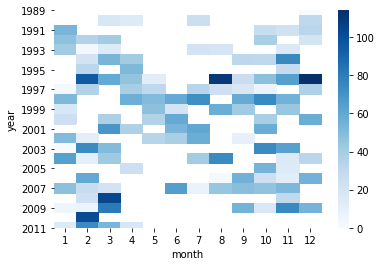

In [165]:
sachin_summary = pd.pivot_table(sachin,
                               columns='month',
                               index='year',
                               values='Runs',
                               aggfunc='mean')
sns.heatmap(sachin_summary, cmap='Blues')

In [167]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
employees = pd.read_csv(url)
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [182]:
summary = pd.pivot_table(employees,
                        columns='Gender',
                        index='JobRole',
                        values='MonthlyIncome',
                        aggfunc='mean')
summary.style.background_gradient(cmap='Blues')

Gender,Female,Male
JobRole,,
Healthcare Representative,7433.8,7589.3
Human Resources,4540.69,4100.22
Laboratory Technician,3246.91,3232.41
Manager,16915.3,17409.3
Manufacturing Director,7409.17,7182.67
Research Director,15144.5,16657.8
Research Scientist,3344.47,3173.04
Sales Executive,6764.31,7033.12
Sales Representative,2671.95,2587.2


### Hands-on

In [192]:
max_date = corona['Date'].max()
country_summary = corona[corona['Date']==max_date]
country_summary['per_deaths'] = country_summary['deaths'] / country_summary['confirmed']

/Users/skathirmani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [196]:
country_summary.sort_values(by='per_deaths',ascending=False).iloc[0]['Country/Region']

'Yemen'

In [205]:
## Exercise 3
# countrywise we need to take diff
# for each country identify day in which max values are there
# among these results, identify the date in which max value is there
result = []
for country, data in corona.groupby(['Country/Region']):
    data['confirmed_absolute'] = data['confirmed'].diff()
    max_value = data['confirmed_absolute'].max()
    max_row = data[data['confirmed_absolute'] == max_value].head(1)
    result.append((country,
                   max_row['Date'].values[0],
                   max_value))
    

/Users/skathirmani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [208]:
countries_max = pd.DataFrame(result,
                             columns=['Country/Region', 'Date', 'cases'])
countries_max.sort_values('cases', ascending=False).head(1)

,Country/Region,Date,cases
79,India,2020-08-26,85687.0


In [228]:
corona_wide = pd.pivot_table(corona,
              index='Country/Region',
              columns='Date',
              values='confirmed',
              aggfunc='first')
corona_wide_diff = corona_wide.diff(axis=1)
corona_wide_diff.reset_index().melt(
    id_vars=['Country/Region']).sort_values(by='value', ascending=False).head(1)

,Country/Region,Date,value
40875,India,2020-08-26,85687.0


### Pandas
- groupby
- filtering operation
- pivot/melt
- join/merge
- describe
- nunique, unique, value_counts
- set_index, reset_index,
- iloc/loc
- sort_values
- apply
- dt, str, plot, style
- resample

### yet to learn
- reindex, append, concat

In [230]:
odi[odi['Runs']>99].groupby('Player')['Runs'].count()

Player
Aamir Sohail              5
Abdool M Samad            1
Abdul Razzaq              3
Abraham B de Villiers    11
Adam C Gilchrist         16
                         ..
Xavier M Marshall         1
Yasir Hameed              3
Younis Khan               6
Yusuf K Pathan            2
Yuvraj Singh             13
Name: Runs, Length: 280, dtype: int64

### Exercise:
Using odi
- Identify Number of years missed by each player, and then compute top 10 players
- Number of times sachin scored less than 10 runs in atleast three consecutive matches